# Fraud Detection System

In [ ]:
%run ../../common/model.requirements.ipynb

In [ ]:
%run ../../common/data.requirements.ipynb

In [ ]:
%run ../../../data/external/synthetic-fraud-detection.ipynb

In [4]:
%run data.preprocessing.ipynb

In [5]:
%run model.build.ipynb

In [6]:
%run model.test.ipynb

In [7]:
data_train = data_preprocessing(df_fraud)

In [8]:
x_train, x_test, y_train, y_test = train_test_split_processing(data=data_train, target='isFraud', test_size=0.20)

In [9]:
encoded_features = [x_train.columns.get_loc(str(feature)) for feature in x_train.columns if x_train[feature].nunique() >= 2 and x_train[feature].nunique() < 10]

In [11]:
xgb = xgb.XGBClassifier()

In [12]:
xgb_params = {'xgbclassifier__n_estimators': [20, 40, 60, 80, 100],
              'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
              'xgbclassifier__learning_rate': [0.05, 0.1, 0.15, 0.20],
              'xgbclassifier__min_child_weight': [1, 2, 3, 4],
              'xgbclassifier__subsample': [0.6, 0.8, 1.0],
              'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]
             }

In [14]:
model = train_model(xgb, xgb_params, x_train, y_train, encoded_features)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     16426
       Fraud       0.95      1.00      0.98      1643

    accuracy                           1.00     18069
   macro avg       0.98      1.00      0.99     18069
weighted avg       1.00      1.00      1.00     18069

Target Threshold @ 0.00
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.97     16426
       Fraud       0.66      1.00      0.80      1643

    accuracy                           0.95     18069
   macro avg       0.83      0.97      0.89     18069
weighted avg       0.97      0.95      0.96     18069



/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

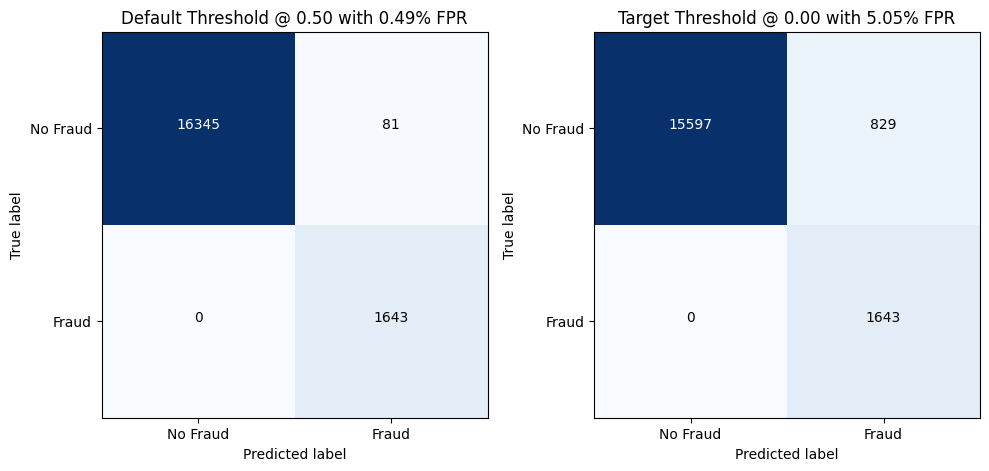

(array([0.        , 0.        , 0.        , ..., 0.9996956 , 0.99981736,
        1.        ]),
 array([0.00000000e+00, 6.08642727e-04, 4.26049909e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.99506879, 1.        ]),
 array([0.94953123, 1.        ]))

In [15]:
test_classifier(model , x_test=x_test, y_test=y_test)